In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Here is my source:
#https://github.com/yhilpisch/py4fi/blob/master/ipython/06_Financial_Time_Series.ipynb

#A little background as DB is getting hammered these days:

#http://wolfstreet.com/2016/07/06/deutsche-bank-crisis-coco-bonds-shares-new-low-bond-buybacks/

In [15]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 10, 20)
db = data.DataReader("DB", 'google', start, end)#Deutsche Bank
dax = data.DataReader("^GDAXI", 'yahoo', start, end)#DAX
iyf= data.DataReader("IYF", 'google', start, end)#US financials
eufn= data.DataReader("EUFN", 'google', start, end)#EU financials



#db.describe()

In [16]:
#lets normalize this
eufn_close = eufn['Close']/eufn['Close'][0]
iyf_close = iyf['Close']/iyf['Close'][0]
dax_close = dax['Close']/dax['Close'][0]
db_close = db['Close']/db['Close'][0]


In [17]:
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_perform = pd.concat([eufn_close, iyf_close, dax_close, db_close], axis=1, keys=['eufn_close', 'iyf_close', 'dax_close', 'db_close'])

In [18]:
df_perform.head()

,eufn_close,iyf_close,dax_close,db_close
Date,,,,
2016-01-04,NaN,NaN,1.000000,NaN
2016-01-05,NaN,NaN,1.002592,NaN
2016-01-06,NaN,NaN,0.993249,NaN
2016-01-07,NaN,NaN,0.970478,NaN
2016-01-08,NaN,NaN,0.957786,NaN


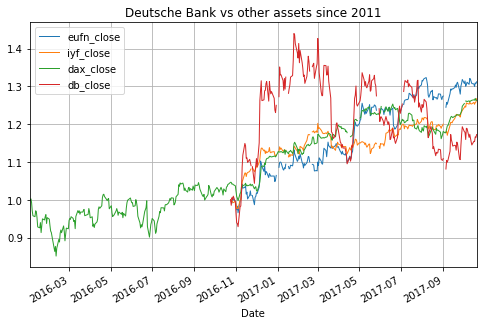

In [20]:
#This plot shows how Deutsche Bank has performed over the past 2 years vis-a-vis other companies
df_perform.plot(figsize=(8,5), lw= 1,grid = True,title='Deutsche Bank vs other assets since 2011', legend=True);

In [21]:
#Let's take log returns of securities aka continuously compounded returns
eufn_returns = np.log(eufn['Close']/eufn['Close'].shift(1))
iyf_returns = np.log(iyf['Close']/iyf['Close'].shift(1))
dax_returns = np.log(dax['Close']/dax['Close'].shift(1))
db_returns = np.log(db['Close']/db['Close'].shift(1))
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_log_returns = pd.concat([eufn_returns, iyf_returns,dax_returns, db_returns], axis=1, keys=['eufn_returns', 'iyf_returns','dax_returns', 'db_returns'])

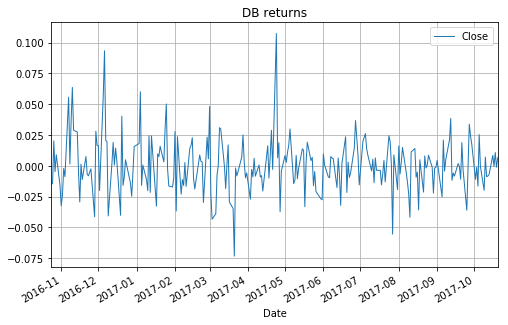

In [26]:
db_returns.plot(figsize=(8,5), lw= 1,grid = True,title='DB returns', legend=True);

In [27]:
#log returns for past five days of selected securities relevant to Deutsche Bank
df_log_returns.tail()

,eufn_returns,iyf_returns,dax_returns,db_returns
Date,,,,
2017-10-16,-0.000859,0.002986,0.000910,0.008408
2017-10-17,-0.005170,-0.003954,-0.000665,-0.000598
2017-10-18,0.007317,0.003691,0.003685,0.010714
2017-10-19,-0.001287,0.001052,-0.004066,-0.001185
2017-10-20,0.003429,0.006986,0.000091,0.006499


In [28]:
#Let's get some moving averages
db['50_day'] = db['Close'].rolling(window=50, center=False).mean()
db['100_day'] = db['Close'].rolling(window=100, center=False).mean()
db['150_day'] = db['Close'].rolling(window=150, center=False).mean()
db['200_day'] = db['Close'].rolling(window=200, center=False).mean()


db[['Close', '50_day', '100_day', '150_day','200_day']].tail()

,Close,50_day,100_day,150_day,200_day
Date,,,,,
2017-10-16,16.72,16.6552,17.3172,17.483333,17.97045
2017-10-17,16.71,16.6248,17.2958,17.466267,17.96350
2017-10-18,16.89,16.6028,17.2801,17.448200,17.95580
2017-10-19,16.87,16.5886,17.2691,17.433800,17.94230
2017-10-20,16.98,16.5910,17.2641,17.424467,17.93090


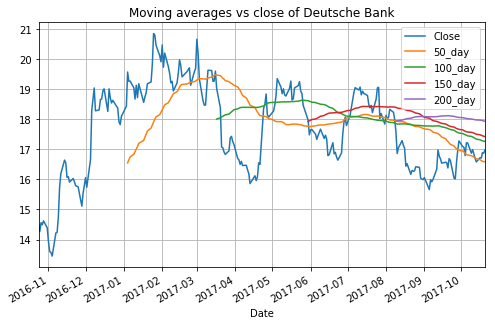

In [29]:
db[['Close', '50_day', '100_day', '150_day','200_day']].plot(figsize=(8,5), grid=True, title="Moving averages vs close of Deutsche Bank");

In [30]:
db_50 = db['50_day']
db_50_plus_10 = db_50*1.10
db_50_minus_10 = db_50*.90

In [31]:
db_50_10pct_window = pd.concat([db['Close'],db_50, db_50_plus_10, db_50_minus_10], axis=1, keys=['db_close','db_50', 'db_50_plus_10', 'db_50_minus_10'])

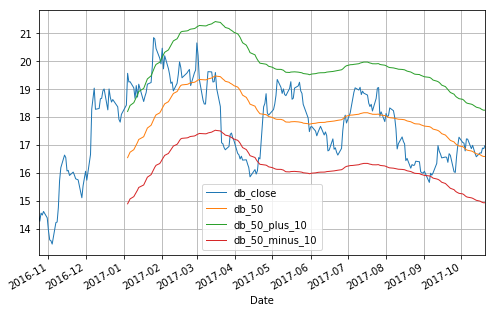

In [32]:
db_50_10pct_window.plot(figsize=(8,5), lw= 1,grid = True);

In [33]:
#What percentage of time did DB close below the .90 mark of its 50 day mavg?
len(np.where(db_50_10pct_window['db_close'] < db_50_10pct_window['db_50_minus_10'])[0])/float(len(db_50_10pct_window))

0.07569721115537849

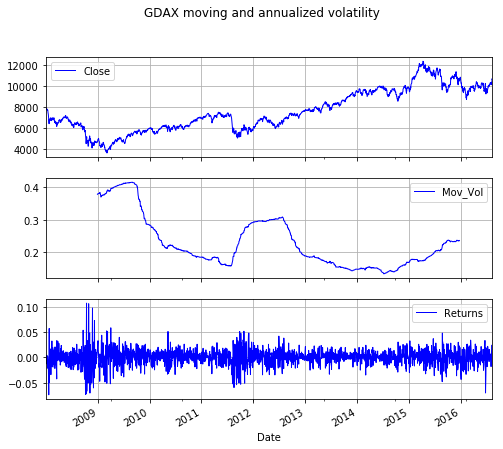

In [36]:
#lets have a look at volatility
import math
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2016, 8, 12)
db = data.DataReader("^GDAXI", 'yahoo', start, end)#GDAX
db['Returns'] = db_returns = np.log(db['Close']/db['Close'].shift(1))
db['Mov_Vol'] = db_returns.rolling(window=252, center=False).std()*math.sqrt(252)
#db_returns.std()


db[['Close', 'Mov_Vol', 'Returns']].plot(subplots=True, style='b', figsize=(8,7), grid=True, lw=1, title='GDAX moving and annualized volatility');

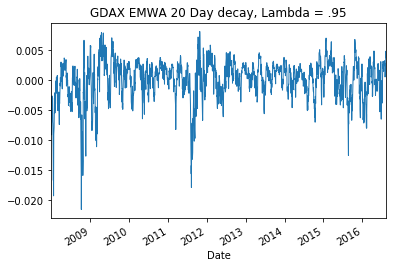

In [39]:
ewma = db_returns.ewm(ignore_na=False,span=20,min_periods=0,adjust=True).mean()
ewma.plot(lw=1, title='GDAX EMWA 20 Day decay, Lambda = .95');

In [40]:
from urllib import urlretrieve

es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <httplib.HTTPMessage instance at 0x11e8525f0>)

In [41]:
!ls -o ./data/*.txt

-rw-r--r--  1 rhodium  688500 Oct 22 12:04 ./data/es.txt
-rw-r--r--  1 rhodium  363485 Oct 22 12:04 ./data/vs.txt


In [42]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]
lines[-6:]

['27.09.2016;2830.24;2970.84;340.19;321.86;405.15;348.15;9010.63;577.18;\n',
 '28.09.2016;2846.55;2991.11;342.57;324.24;407.97;350.45;9072.09;581.27;\n',
 '29.09.2016;2848.93;2991.58;342.72;324.08;407.65;350.90;9112.09;582.60;\n',
 '30.09.2016;2843.17;3002.24;342.92;325.31;408.27;350.09;9115.81;583.26;\n',
 '03.10.2016;2845.43;2998.50;343.23;325.08;408.44;350.92;9131.24;584.32;\n',
 '04.10.2016;2871.06;3029.50;346.10;327.73;411.41;353.92;9212.05;588.71;\n']

In [43]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [44]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [45]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, dayfirst=True)

In [46]:
vs.tail()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [47]:
import datetime as dt

#Let's create a dataframe based on the EURO STOXX 50 indices and the Volatility of this index
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999,1,1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999,1,1)]}))

In [48]:
#lets fill in missing data
data = data.fillna(method='ffill')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


In [50]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


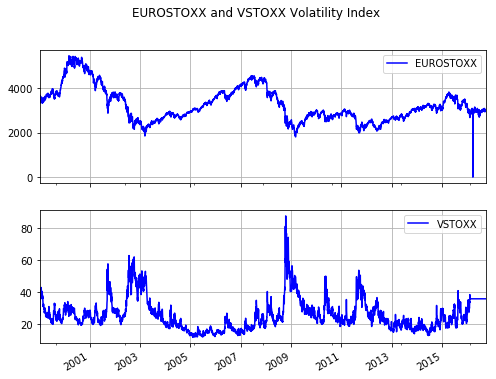

In [51]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6),lw=1.5, title="EUROSTOXX and VSTOXX Volatility Index");


In [52]:
returns = np.log(data/data.shift(1))
returns.head()

/Users/livingdharma/miniconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


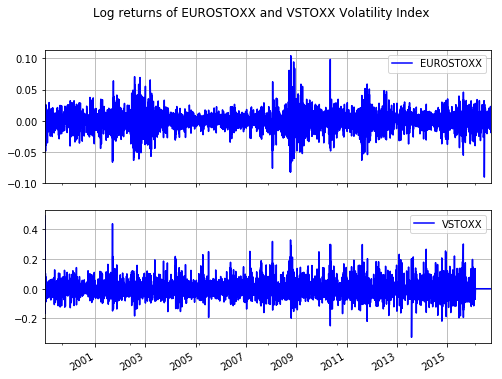

In [53]:
returns.plot(subplots=True, grid=True, style='b', figsize=(8,6),lw=1.5, title="Log returns of EUROSTOXX and VSTOXX Volatility Index");


In [98]:
import statsmodels.api as sm
xdat = returns['EUROSTOXX'][1:-150]
xdat = sm.add_constant(xdat)
ydat = returns['VSTOXX'][1:-150]
model = sm.OLS(ydat,xdat)
result = model.fit()
result.params

const        0.000046
EUROSTOXX   -2.834343
dtype: float64

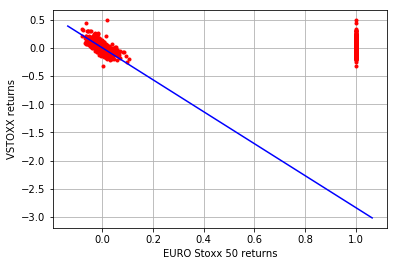

In [104]:
plt.plot(xdat,ydat, 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, result.params[0] + result.params[1] * x, 'b', lw=1.5);
plt.grid(True)
plt.xlabel('EURO Stoxx 50 returns');
plt.ylabel('VSTOXX returns');

In [92]:
#Lets look at the covariance matrix
returns.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


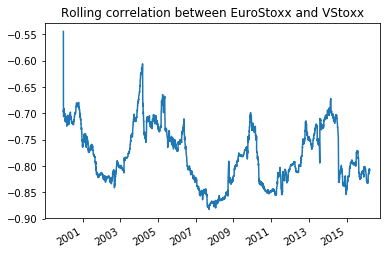

In [144]:
#pd.rolling_corr(returns.EUROSTOXX, returns.VSTOXX, window = 252).plot(grid=True)
returns['EUROSTOXX'].rolling(window=252).corr(other=returns['VSTOXX']).plot(title='Rolling correlation between EuroStoxx and VStoxx');

In [113]:
#High Frequency Data

url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [118]:
year ='2017'
month = '10'
days = ['08', '09', '10', '11', '12']

In [119]:
NKE = pd.DataFrame()

for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day), 
                                index_col=0, header=0, parse_dates=True))
    
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']


In [120]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35259 entries, 2017-10-09 10:00:01 to 2017-10-12 22:12:16
Data columns (total 6 columns):
bid        35259 non-null float64
bdepth     35259 non-null object
bdeptht    35259 non-null object
offer      35259 non-null float64
odepth     35259 non-null object
odeptht    35259 non-null object
dtypes: float64(2), object(4)
memory usage: 1.9+ MB


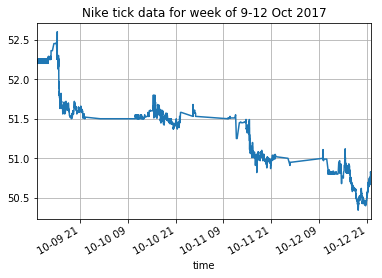

In [131]:
NKE['bid'].plot(grid=True, title='Nike tick data for week of 9-12 Oct 2017');

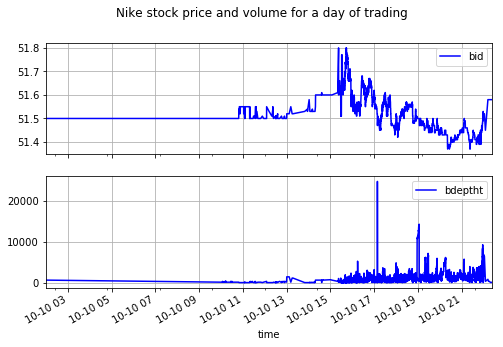

In [149]:
tick_vol_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 10,10,0,0)) & (NKE.index < dt.datetime(2017, 10, 11, 0, 0))]

tick_vol_plot.plot(subplots=True, style='b', figsize=(8,5), grid=True, title='Nike stock price and volume for a day of trading');


In [136]:
NKE_resam = NKE.resample('5T').mean()
np.around(NKE_resam.head(), 2)

,bid,offer
time,,
2017-10-09 10:00:00,52.20,53.01
2017-10-09 10:05:00,52.20,53.01
2017-10-09 10:10:00,52.23,53.01
2017-10-09 10:15:00,NaN,NaN
2017-10-09 10:20:00,52.22,53.01


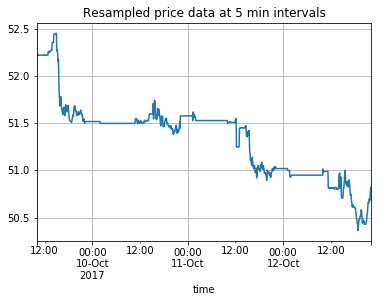

In [138]:

NKE_resam['bid'].fillna(method='ffill').plot(grid=True, title='Resampled price data at 5 min intervals');

In [139]:
def reversal(x):
    return 2*95-x

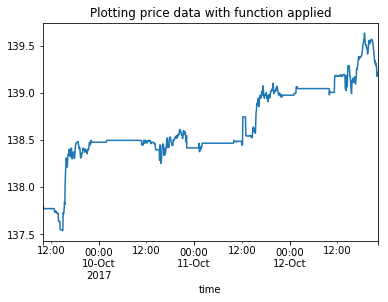

In [140]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(title='Plotting price data with function applied');